# Benefit of MPL System Modelling

##### Py Packages

In [1]:
import numpy as np
from copy import deepcopy as dc

from functionfile_system_definition import sys_from_file, system_display_matrix
from functionfile_system_mplcost import cost_function_1, initial_values_init, actuator_selection_cost_1, plot_actuator_selection_1, simulation_actuator_selection, plot_simulation

## Code

In [2]:
test_set = 'System Model 1'
S_True = sys_from_file(test_set + ' True')
# system_display_matrix(S_True)
initial_values = initial_values_init(S_True, T=50)

System read from file @ system_model/System Model 1 True.pickle 

Generating random sample of initial state from given distribution for simulation


## Control of True System based on Nominal System model

##### Run Code

In [3]:
S_Nominal = sys_from_file(test_set + ' Nominal')

System read from file @ system_model/System Model 1 Nominal.pickle 



In [4]:
ret1_nom = actuator_selection_cost_1(S_Nominal, initial_values=initial_values)
S_Nominal = dc(ret1_nom['system'])
# system_display_matrix(S_Nominal)
S_True['B'] = dc(S_Nominal['B'])
ret2_nom = simulation_actuator_selection(S_Nominal, S_True, initial_values=initial_values)

##### Display Output

In [5]:
print('Cost change with |S|:\n')
for i in ret2_nom['costs']:
    print('|S|:',i, ' => ', ret2_nom['costs'][i][-1])

Cost change with |S|:

|S|: 1  =>  186.56230752230024
|S|: 2  =>  159.16507569135854
|S|: 3  =>  156.04994107846673
|S|: 4  =>  132.70159873147503
|S|: 5  =>  132.54557785389773
|S|: 6  =>  130.5259625292026
|S|: 7  =>  126.5365240249935
|S|: 8  =>  125.9990396458365


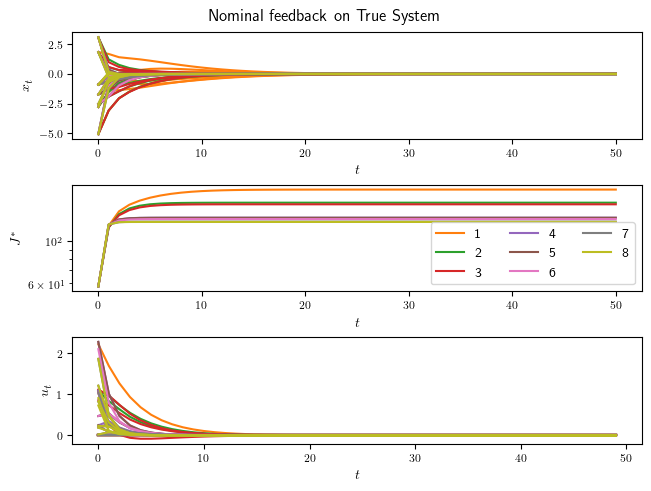

In [6]:
plot_simulation(display_data=ret2_nom, fname='Nominal feedback on True System')

## Control of True System based on MPL System model

##### Run Code

In [7]:
S_MPL = sys_from_file(test_set + ' MPL')

System read from file @ system_model/System Model 1 MPL.pickle 



In [8]:
ret1_MPL = actuator_selection_cost_1(S_MPL, initial_values=initial_values)
S_MPL = dc(ret1_MPL['system'])
# system_display_matrix(S_MPL)
S_True['B'] = dc(S_MPL['B'])
ret2_MPL = simulation_actuator_selection(S_MPL, S_True, initial_values=initial_values)

##### Display Output

In [9]:
print('Cost change with |S|:\n')
for i in ret2_MPL['costs']:
    print('|S|:',i, ' => ', ret2_MPL['costs'][i][-1])

Cost change with |S|:

|S|: 1  =>  186.56230752230024
|S|: 2  =>  159.16507569135854
|S|: 3  =>  156.04994107846673
|S|: 4  =>  132.70159873147503
|S|: 5  =>  132.54557785389773
|S|: 6  =>  130.5259625292026
|S|: 7  =>  126.5365240249935
|S|: 8  =>  125.9990396458365


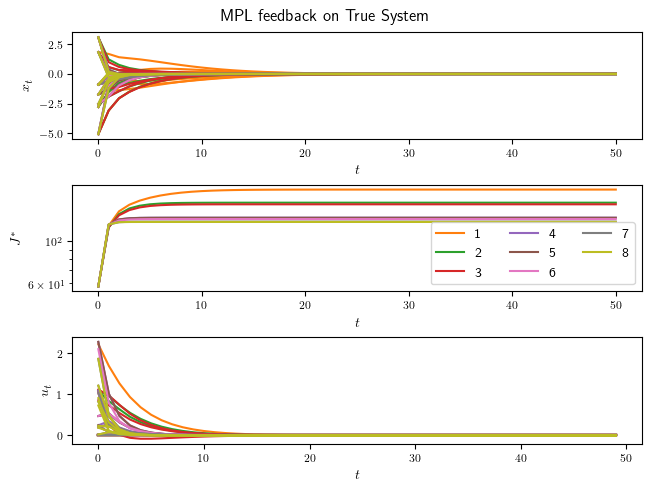

In [10]:
plot_simulation(display_data=ret2_MPL, fname='MPL feedback on True System')

## Self-Control Tests

### Testing Nominal control on itself

##### Run Code

In [11]:
ret3_nom = simulation_actuator_selection(S_Nominal, S_Nominal)

Generating random sample of initial state from given distribution for simulation


##### Display Output

In [12]:
# plot_actuator_selection_1(S_Nominal['B'], ret1_nom['cost_trend'], ret1_nom['time_trend'], ret1_nom['check_trend'], fname='Nominal Actuator Selection')

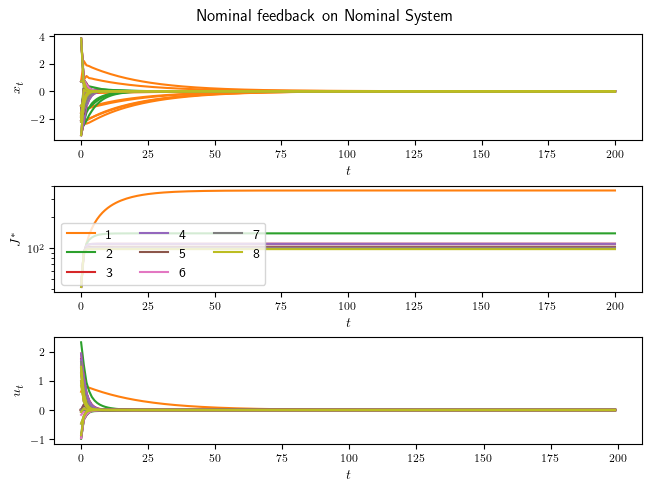

|S|: 1  =>  365.1603633178067
|S|: 2  =>  139.48608829976624
|S|: 3  =>  110.43517081449504
|S|: 4  =>  110.25795327065994
|S|: 5  =>  103.39075607083376
|S|: 6  =>  100.6799273468668
|S|: 7  =>  99.95675499081743
|S|: 8  =>  97.87648815571877


In [13]:
plot_simulation(display_data=ret3_nom, fname='Nominal feedback on Nominal System')
for i in ret3_nom['costs']:
    print('|S|:',i, ' => ', ret3_nom['costs'][i][-1])

### Testing MPL control on itself

##### Run Code

In [14]:
ret3_MPL = simulation_actuator_selection(S_MPL, S_MPL)

Generating random sample of initial state from given distribution for simulation
====> Breaking current simulation at t= 39  as cumulative cost magnitude exceed 10^(10)
====> Breaking current simulation at t= 121  as cumulative cost magnitude exceed 10^(10)


##### Display Output

In [15]:
# plot_actuator_selection_1(S_MPL['B'], ret1_MPL['cost_trend'], ret1_MPL['time_trend'], ret1_MPL['check_trend'], fname='MPL Actuator Selection')

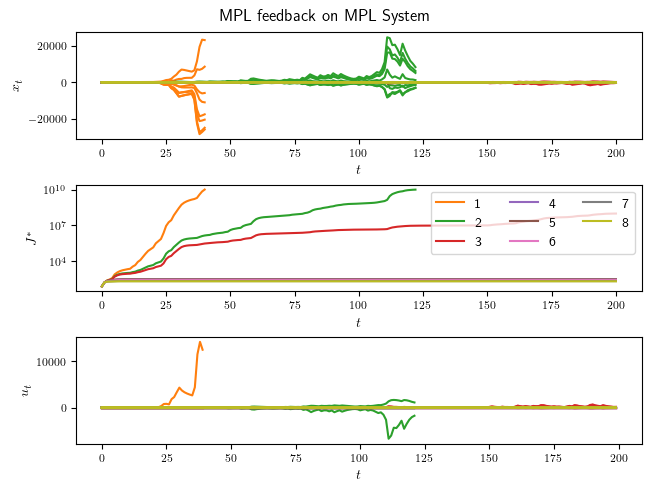

|S|: 1  =>  nan
|S|: 2  =>  nan
|S|: 3  =>  98942572.0444875
|S|: 4  =>  302.4371547316309
|S|: 5  =>  299.1409484894908
|S|: 6  =>  256.02543659734215
|S|: 7  =>  214.68507004593297
|S|: 8  =>  204.52881146594015


In [16]:
plot_simulation(display_data=ret3_MPL, fname='MPL feedback on MPL System')
for i in ret3_MPL['costs']:
    print('|S|:',i, ' => ', ret3_MPL['costs'][i][-1])